In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# **Task1**
Import data from daily-bike-share.csv and viewing first 5 rows of data. 

In [9]:
data = pd.read_csv('/content/sample_data/daily-bike-share.csv')
print(data.head(5))

# Checking if any datapoint is null or not
print(data.isnull().values.any())

   instant    dteday  season  yr  ...     atemp       hum  windspeed  rentals
0        1  1/1/2011       1   0  ...  0.363625  0.805833   0.160446      331
1        2  1/2/2011       1   0  ...  0.353739  0.696087   0.248539      131
2        3  1/3/2011       1   0  ...  0.189405  0.437273   0.248309      120
3        4  1/4/2011       1   0  ...  0.212122  0.590435   0.160296      108
4        5  1/5/2011       1   0  ...  0.229270  0.436957   0.186900       82

[5 rows x 14 columns]
False


# **Task2**

Creating Histogram for features 'temp' and 'windspeed', also adding lines for mean and median of each distribution.

## **Histogram for 'temp'**

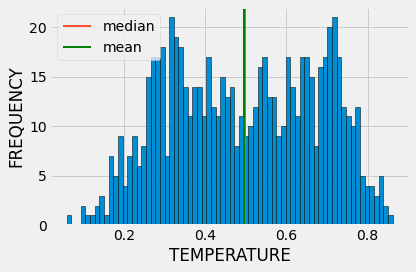

In [10]:
color_median = '#fc4f30'
color_mean = '#008000'

plt.style.use('fivethirtyeight')

temp = data['temp']

plt.hist(temp, bins = 70, edgecolor = 'black')

mean_temp = temp.mean()
median_temp =temp.median()

plt.axvline(median_temp, color=color_median, label='median', linewidth = 2)
plt.axvline(mean_temp, color=color_mean, label = 'mean', linewidth = 2)
plt.legend()

plt.xlabel('TEMPERATURE')
plt.ylabel('FREQUENCY')
plt.tight_layout()
plt.show()

## **Histogram for 'windspeed'**

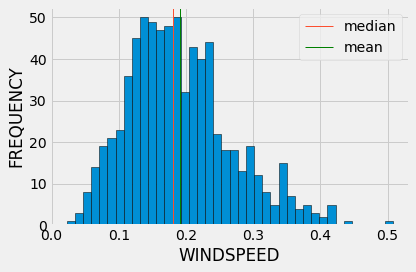

In [11]:
windspeed = data['windspeed']

plt.hist(windspeed, bins = 40, edgecolor = 'black')

mean_windspeed = windspeed.mean()
median_windspeed = windspeed.median()

plt.axvline(median_windspeed, color=color_median, label='median', linewidth = 1)
plt.axvline(mean_windspeed, color=color_mean, label='mean',  linewidth = 1)
plt.legend()

plt.xlabel('WINDSPEED')
plt.ylabel('FREQUENCY')
plt.tight_layout()
plt.show()

# **Task3 & Task4**
Dividing data in training and testing and then Seperating features(droping some) and labels from dataset 

In [12]:
# Using OHE on all the categorical features
categorical_cols = ['season', 'mnth', 'holiday','weekday','workingday','weathersit']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Splitting Dataset into testing and training (3:7)
training_data = data.sample(frac=0.7, random_state = 25)
testing_data = data.drop(training_data.index)

# Dropping useless columns
X_train = training_data.drop(columns=['instant', 'dteday','yr','rentals']).to_numpy()
Y_train = training_data['rentals'].to_numpy() 

X_test = testing_data.drop(columns=['instant', 'dteday', 'yr', 'rentals']).to_numpy()
Y_test = testing_data['rentals'].to_numpy()

# **Task5 & Task6 & Task7**
Build suitable Machine Learning model, Predicting on Test data, Calculating R-Squared to find accuracy.


In [13]:
# Did experimentation with Linear Regression(R2 Score = 0.65), Ridge Regression(R2 Score = 0.688 with best_alpha=3), Lasso Lars(R2 Score = 0.6517), 
# Bayesian Ridge Regression(R2 Score = 0.6820), and Finally using Multi-layer Perceptron Regression(R2 Score = 0.779) using nuerons_list as [28, 100, 1]
# Using Early Stopping criteria on Neural Network to get maximum validation error

nn = MLPRegressor(random_state = 1, max_iter = 50000, activation = 'logistic', solver = 'adam', shuffle = True, tol = 1e-15, verbose = True, early_stopping=True)
nn.fit(X_train, Y_train)

# Predicting on test data
Y_pred = nn.predict(X_test)

Streaming output truncated to the last 5000 lines.
Validation score: 0.554913
Iteration 4999, loss = 99447.86222322
Validation score: 0.555059
Iteration 5000, loss = 99416.12810616
Validation score: 0.555198
Iteration 5001, loss = 99384.72191228
Validation score: 0.555333
Iteration 5002, loss = 99349.66645548
Validation score: 0.555458
Iteration 5003, loss = 99317.82350649
Validation score: 0.555590
Iteration 5004, loss = 99283.29621132
Validation score: 0.555732
Iteration 5005, loss = 99251.12277290
Validation score: 0.555873
Iteration 5006, loss = 99216.40881162
Validation score: 0.556010
Iteration 5007, loss = 99185.87161560
Validation score: 0.556130
Iteration 5008, loss = 99149.75974210
Validation score: 0.556252
Iteration 5009, loss = 99119.14055746
Validation score: 0.556369
Iteration 5010, loss = 99086.44684954
Validation score: 0.556512
Iteration 5011, loss = 99053.46420621
Validation score: 0.556661
Iteration 5012, loss = 99021.01040645
Validation score: 0.556799
Iteration 50

R2 Score -->0.779450306789784
Training loss curve-->


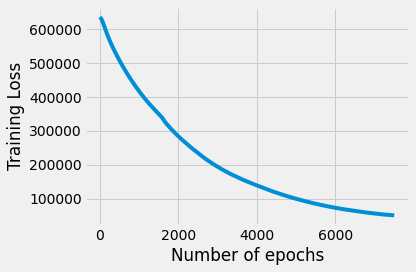

In [14]:
# Storing Training Loss 
training_loss = nn.loss_curve_

# Plotting Training Loss on each iteration
plt.plot([(i+1) for i in range(len(training_loss))], training_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")

# Calculating R2 Score for our predictions
r2_score = r2_score(Y_test , Y_pred)

print("=============================")
print("R2 Score -->" + str(r2_score))
print("=============================")
print("Training loss curve-->")
plt.tight_layout()
plt.show()